# Project: Investigate a Dataset - [Dataset-Gapminder World]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


### Dataset Description 

Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. For this project, I will investigate social-demographic factors affecting the world. From the gapminder dataset i have chosen three indicators which are population growth, people living with HIV and the sex ratio. 

The population growth indicator has three columns which are geo, time and the population growth column. The geo column contains country codes for all the countries in the world abbreviated with three letters. The time column contains the years when the data was first recorded up to the projected year of 2100. The population column is the percentage each population growth each year. The people living with HIV indicator has the first two columns mentioned in the preceeding indicator but the third column is number of people living with HIV each year. The sex ratio is the number of males for every 100 females in a population. The sex ratio indicator has also three columns, with the first two as mentioned in the preceeding indicators and the last column being the ratio. 
 


### Question(s) for Analysis
 

1. How does the associations between the variables reflect?

2. Which countries are the top performers in population growth this year?

In [1]:
#packages to use in the project
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
data1 = pd.read_csv('ddf--datapoints--population_growth_annual_percent_with_projections--by--geo--time.csv')
data2 = pd.read_csv('ddf--datapoints--people_living_with_hiv_number_all_ages--by--geo--time.csv')
data3 = pd.read_csv('ddf--datapoints--sex_ratio_all_age_groups--by--geo--time.csv')

In [3]:
data1.head()

,geo,time,population_growth_annual_percent_with_projections
0,abw,1950,0.566
1,abw,1951,1.182
2,abw,1952,2.402
3,abw,1953,3.469
4,abw,1954,4.259


In [4]:
data2.head()

,geo,time,people_living_with_hiv_number_all_ages
0,afg,1990,600
1,afg,1991,600
2,afg,1992,1000
3,afg,1993,1100
4,afg,1994,1200


In [5]:
data3.head()

,geo,time,sex_ratio_all_age_groups
0,abw,1950,93.592
1,abw,1955,94.758
2,abw,1960,96.164
3,abw,1965,95.985
4,abw,1970,95.706


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30150 entries, 0 to 30149
Data columns (total 3 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   geo                                                30150 non-null  object 
 1   time                                               30150 non-null  int64  
 2   population_growth_annual_percent_with_projections  30150 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 706.8+ KB


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 3 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   geo                                     3323 non-null   object
 1   time                                    3323 non-null   int64 
 2   people_living_with_hiv_number_all_ages  3323 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 78.0+ KB


In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6231 entries, 0 to 6230
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geo                       6231 non-null   object 
 1   time                      6231 non-null   int64  
 2   sex_ratio_all_age_groups  6231 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 146.2+ KB


In [9]:
sum(data1.duplicated())

0

In [10]:
sum(data2.duplicated())

0

In [11]:
sum(data3.duplicated())

0

From the three data tables we can see that the data tables have the same number of columns/features but different number of rows. We can also identify that geo and time columns are present on all data tables which will act as keys when combining the tables. The quick data explorations show that the data tables have no missing data and duplicates. This does not mean our data is ready for analysis because our data is not in the right format to answer our questions.

The role of data cleaning is to make our Exploratory Data Analysis (EDA) or Featuring Engineering produce the most accurate results. Steps that can be taken at this stage maybe for example dropping columns that are not relevant to the questions, creating new columns to answer the questions, renaming columns, dealing with null values but to name a few.

In [12]:
data1_data2 = pd.merge(data1, data2, on = ('geo', 'time'), how = 'outer')
data1_data2.head()

,geo,time,population_growth_annual_percent_with_projections,people_living_with_hiv_number_all_ages
0,abw,1950,0.566,NaN
1,abw,1951,1.182,NaN
2,abw,1952,2.402,NaN
3,abw,1953,3.469,NaN
4,abw,1954,4.259,NaN


In [13]:
combined_data = pd.merge(data1_data2, data3, on = ('geo', 'time'), how = 'outer')
combined_data.head()

,geo,time,population_growth_annual_percent_with_projections,people_living_with_hiv_number_all_ages,sex_ratio_all_age_groups
0,abw,1950,0.566,NaN,93.592
1,abw,1951,1.182,NaN,NaN
2,abw,1952,2.402,NaN,NaN
3,abw,1953,3.469,NaN,NaN
4,abw,1954,4.259,NaN,NaN


In [14]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30351 entries, 0 to 30350
Data columns (total 5 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   geo                                                30351 non-null  object 
 1   time                                               30351 non-null  int64  
 2   population_growth_annual_percent_with_projections  30150 non-null  float64
 3   people_living_with_hiv_number_all_ages             3323 non-null   float64
 4   sex_ratio_all_age_groups                           6231 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ MB


The reason I chose the outer join instead of the inner, right or left join is that I wanted to keep all the the information from all the tables because these other techniques were going to drop some of the information

In [15]:
#Change the column names
combined_data.rename(columns = {'geo':'country_code', 'time':'year', 'population_growth_annual_percent_with_projections':'population_growth_annual_percent', 'people_living_with_hiv_number_all_ages':'people_living_with_hiv', 'sex_ratio_all_age_groups':'sex_ratio'}, inplace = True)
combined_data.head()

,country_code,year,population_growth_annual_percent,people_living_with_hiv,sex_ratio
0,abw,1950,0.566,NaN,93.592
1,abw,1951,1.182,NaN,NaN
2,abw,1952,2.402,NaN,NaN
3,abw,1953,3.469,NaN,NaN
4,abw,1954,4.259,NaN,NaN


Since the resulting dataframe after merging resulted in many null values, we have to find a way to deal with them.

In [16]:
combined_data["population_growth_annual_percent"].fillna(combined_data["population_growth_annual_percent"].median(), inplace = True)

In [17]:
combined_data["people_living_with_hiv"].fillna(combined_data["people_living_with_hiv"].median(), inplace = True)

In [18]:
combined_data["sex_ratio"].fillna(combined_data["sex_ratio"].median(), inplace = True)

In [19]:
combined_data.isnull().sum()

country_code                        0
year                                0
population_growth_annual_percent    0
people_living_with_hiv              0
sex_ratio                           0
dtype: int64

I used the method of replacing the null values with the median instead of drop the rows/columns with null values.

In [20]:
combined_data.country_code.nunique()

201

In [21]:
#install a package
!pip install country_converter

In [22]:
#Importing packages to create the continent and country columns.
import country_converter as coco

In [23]:
#Creating the country column
converter = coco.CountryConverter()

In [24]:
iso3_codes = combined_data.country_code

In [25]:
country = converter.convert(names = iso3_codes, to = 'name')

chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
c

nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
chanisl not found in regex
nld_curacao not found in regex


In [26]:
#Creating the continent column
continent = converter.convert(names = iso3_codes, to = 'continent')

chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
chanisl not found in regex
c

nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
nld_curacao not found in regex
chanisl not found in regex
nld_curacao not found in regex


In [27]:
#merging the country and continent columns to the dataframe
combined_data['country'] = country
combined_data['continent'] = continent
combined_data.head()

,country_code,year,population_growth_annual_percent,people_living_with_hiv,sex_ratio,country,continent
0,abw,1950,0.566,12000.0,93.592,Aruba,America
1,abw,1951,1.182,12000.0,98.869,Aruba,America
2,abw,1952,2.402,12000.0,98.869,Aruba,America
3,abw,1953,3.469,12000.0,98.869,Aruba,America
4,abw,1954,4.259,12000.0,98.869,Aruba,America


In [28]:
#Dropping country code that are not found in regex
values = ["chanisl", "nld_curacao", "deu_east", "deu_west", "hos", "kos", "scg", "ussr", "yem_north", "yem_south", "yug"]
combined_data = combined_data[combined_data.country_code.isin(values) == False]
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 30350
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_code                      30049 non-null  object 
 1   year                              30049 non-null  int64  
 2   population_growth_annual_percent  30049 non-null  float64
 3   people_living_with_hiv            30049 non-null  float64
 4   sex_ratio                         30049 non-null  float64
 5   country                           30049 non-null  object 
 6   continent                         30049 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ MB


In [29]:
#Changing the order of the columns
combined_data = combined_data.loc[:, ["country_code", "country", "continent", "year", "people_living_with_hiv", "sex_ratio", "population_growth_annual_percent"]]
combined_data.head()

,country_code,country,continent,year,people_living_with_hiv,sex_ratio,population_growth_annual_percent
0,abw,Aruba,America,1950,12000.0,93.592,0.566
1,abw,Aruba,America,1951,12000.0,98.869,1.182
2,abw,Aruba,America,1952,12000.0,98.869,2.402
3,abw,Aruba,America,1953,12000.0,98.869,3.469
4,abw,Aruba,America,1954,12000.0,98.869,4.259


In [30]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 30350
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_code                      30049 non-null  object 
 1   country                           30049 non-null  object 
 2   continent                         30049 non-null  object 
 3   year                              30049 non-null  int64  
 4   people_living_with_hiv            30049 non-null  float64
 5   sex_ratio                         30049 non-null  float64
 6   population_growth_annual_percent  30049 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ MB


Now the only thing left is to change the data types to the correct format. We can see that all columns except the year and people living with HIV columns are in proper format. We going to change year from integer to date type and float to integer for people living with HIV because we cannot be accounted as a fraction, on whole positive number should be used.

In [31]:
#changing data type for year from int to date type
combined_data['year'] = pd.to_datetime(combined_data['year'], format = '%Y')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 30350
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   country_code                      30049 non-null  object        
 1   country                           30049 non-null  object        
 2   continent                         30049 non-null  object        
 3   year                              30049 non-null  datetime64[ns]
 4   people_living_with_hiv            30049 non-null  float64       
 5   sex_ratio                         30049 non-null  float64       
 6   population_growth_annual_percent  30049 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 1.8+ MB


In [32]:
#changing data type for people living with hiv from float to int

def data_type(x):
    return np.int64(x)

combined_data.people_living_with_hiv = combined_data.people_living_with_hiv.apply(data_type)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 30350
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   country_code                      30049 non-null  object        
 1   country                           30049 non-null  object        
 2   continent                         30049 non-null  object        
 3   year                              30049 non-null  datetime64[ns]
 4   people_living_with_hiv            30049 non-null  int64         
 5   sex_ratio                         30049 non-null  float64       
 6   population_growth_annual_percent  30049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.8+ MB


In [33]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 30350
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   country_code                      30049 non-null  object        
 1   country                           30049 non-null  object        
 2   continent                         30049 non-null  object        
 3   year                              30049 non-null  datetime64[ns]
 4   people_living_with_hiv            30049 non-null  int64         
 5   sex_ratio                         30049 non-null  float64       
 6   population_growth_annual_percent  30049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.8+ MB


Now the all the columns are in the right format. But all the entries to the first day of the year which is not a problem because that the default format for the date convection. Now that since we are down with data cleaning we can head to data analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1  (How does the associations between the variables reflect?)

In [34]:
combined_data.describe()

,people_living_with_hiv,sex_ratio,population_growth_annual_percent
count,3.004900e+04,30049.000000,30049.000000
mean,2.798017e+04,99.180990,1.069137
std,1.640158e+05,6.193944,1.453028
min,1.000000e+01,74.353000,-7.099000
25%,1.200000e+04,98.869000,0.021000
50%,1.200000e+04,98.869000,0.810000
75%,1.200000e+04,98.869000,1.984000
max,5.600000e+06,324.752000,17.612000


The table above shows the descriptive statistics for the non categorical columns in our table. The table shows that the minimum number of people living the HIV ever recorded is 10 and the maximum is 5 million. The average of people living with HIV is 27980. The lower quartile, median and upper quartile are at 12000.

The minimum number of males per every 100 females is 74 and the maximum is just over 324. The lower quartile, median and upper quartile are approximately 99. The mean is at 99.18 with a standard deviation of 6.19.

The maximum population growth is around 17 percent, with the minimum being negative 7 percent. The average population growth is around 1.06 percent, with a standard deviation of 1.45 percent. The 25%, 50% and 75% quartiles are 0.02%, 0.81% and 1.98% respectively.

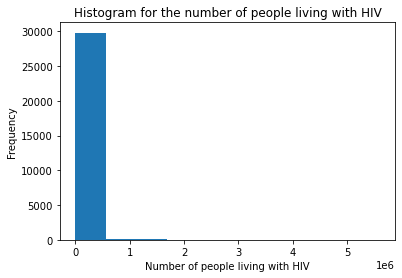

In [40]:
plt.hist(combined_data.people_living_with_hiv, bins = 10)
plt.xlabel('Number of people living with HIV')
plt.ylabel('Frequency')
plt.title('Histogram for the number of people living with HIV')
plt.show()

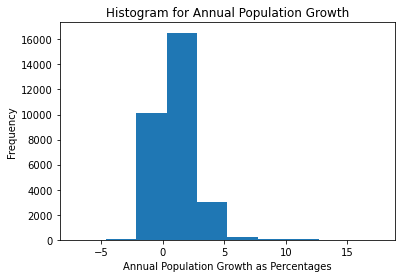

In [36]:
plt.hist(combined_data.population_growth_annual_percent)
plt.xlabel('Annual Population Growth as Percentages')
plt.ylabel('Frequency')
plt.title('Histogram for Annual Population Growth')
plt.show()

The histograms all show that the data is positively skewed in all the indicators but the people living with HIV is not slightly illustrating a uniform distribution.

In [41]:
data = combined_data[['people_living_with_hiv', 'sex_ratio', 'population_growth_annual_percent']]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30049 entries, 0 to 30350
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   people_living_with_hiv            30049 non-null  int64  
 1   sex_ratio                         30049 non-null  float64
 2   population_growth_annual_percent  30049 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 939.0 KB


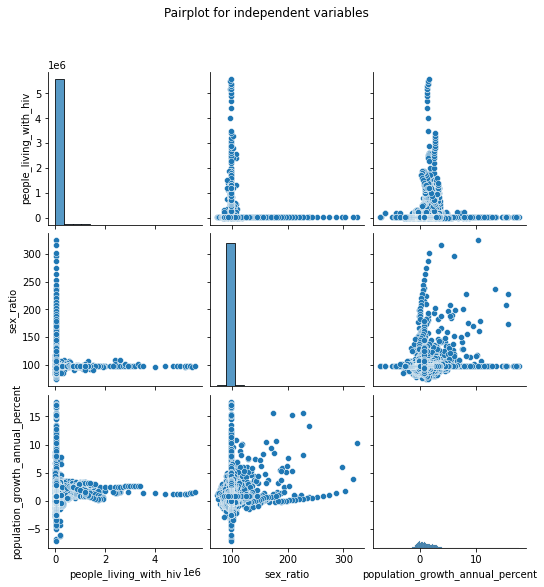

In [44]:
p = sns.pairplot(data, kind = "scatter")
p.fig.suptitle('Pairplot for independent variables', y = 1.08)
plt.show()

The pairwise plot show that the associations between the variables are weak or not clearly visible. The best way to deal with this is to make transformations to our data. We can normalize our variable by producing residual or logarizing the scales.

In [45]:
from sklearn import preprocessing

In [46]:
data = preprocessing.normalize(data)
names = ["people_living_with_hiv", "sex_ratio", "population_growth_annual_percent"]
data = pd.DataFrame(data, columns = names)
data.head()

,people_living_with_hiv,sex_ratio,population_growth_annual_percent
0,0.999970,0.007799,0.000047
1,0.999966,0.008239,0.000098
2,0.999966,0.008239,0.000200
3,0.999966,0.008239,0.000289
4,0.999966,0.008239,0.000355


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30049 entries, 0 to 30048
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   people_living_with_hiv            30049 non-null  float64
 1   sex_ratio                         30049 non-null  float64
 2   population_growth_annual_percent  30049 non-null  float64
dtypes: float64(3)
memory usage: 704.4 KB


In [ ]:
g = sns.pairplot(data, kind = "scatter")
g.fig.suptitle('Pairplot for normalized independent variables', y = 1.08)
plt.show()

Now we can see that the transformations have improved the our plots in terms of getting the insights of the associations. The population growth and the sex ratio show a positive association meaning that as the population grows the number of males per 100 females in a population grows. The association between the sex ratio and people living with HIV shows a negative association meaning as the number of people living with HIV grows the ratio of males getting the HIV goes down. Lasty there is no association between population growth and people living with HIV as most data points are saturated at the center.

In [42]:
combined_data = combined_data.set_index('year')

### Research Question 2  (Which countries are the top performers in population growth this year?)

In [43]:
# 2022 population increase
current_population = combined_data.loc['2022-01-01'].nlargest(20,'population_growth_annual_percent')
current_population.head()

,country_code,country,continent,people_living_with_hiv,sex_ratio,population_growth_annual_percent
year,,,,,,
2022-01-01,syr,Syria,Asia,12000,98.869,6.079
2022-01-01,ner,Niger,Africa,12000,98.869,3.710
2022-01-01,ago,Angola,Africa,12000,98.869,3.162
2022-01-01,gnq,Equatorial Guinea,Africa,12000,98.869,3.125
2022-01-01,cod,DR Congo,Africa,12000,98.869,3.031


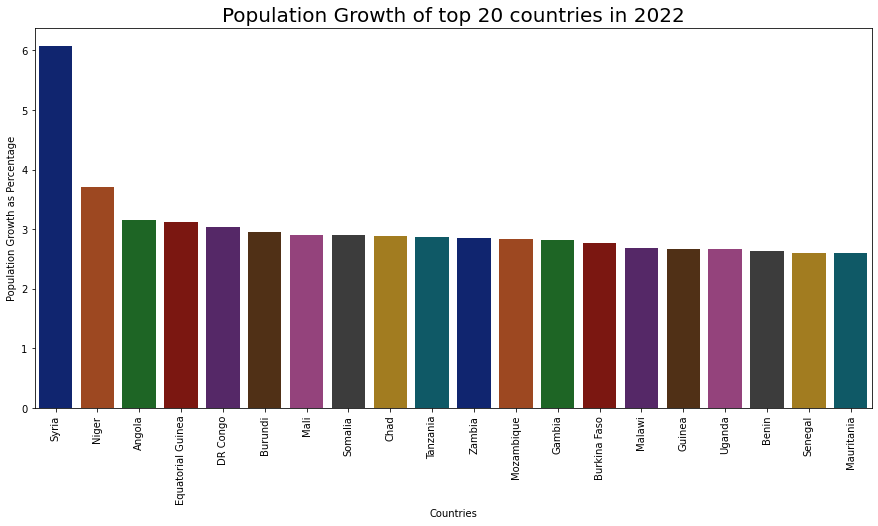

In [44]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = current_population['country'], y = current_population['population_growth_annual_percent'], palette = 'dark')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Population Growth as Percentage', fontsize = 10)
ax.set_title(label = 'Population Growth of top 20 countries in 2022', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

For the year 2022, Syria is the country with the fasted growng population in the world with a percentage growth of over 6%. Also Syria is the only non-African country on the top performers.

<a id='conclusions'></a>
## Conclusions


### Results: Our data suggests that
 
1. The population growth and the sex ratio has a weak positive correlation implies that as the population increase for a country the number of males per every 100 females also increases.
2. Sex ratio and people living with HIV had a strong negative correlation implies that the as the number of males per 100 females for a population increase, the number of people living with HIV decrease and the opposite is true.
3. From the bar plot of the top 20 countries with the fastest growing populations in the current year, we can see that 19 out of 20 are countries in African meaning African has the fastest growing percentage in population growth compared to other continent. 
4. Syria was the not just only the non-African country that was on the top performers in terms of population  growth in 2022 but it was also the country with the highest percentage growth around the world.


### Limitations: There are a couple of limitations with our data:

1. Our data tables only had country codes which made it difficult to distinguish between countries. I had to use a import a package outside the anaconda library.
2. The statistics used here are descriptive statistics which made it difficult to give inference about our data. The application of inference statistics and machine learning would have proved helpful to our analysis.

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295